In [137]:
import os
import scprep, scanpy, phate
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data_objects = {}
for dir in os.listdir('data'):
    obj = scanpy.read_10x_h5(f'data/{dir}/filtered_feature_bc_matrix.h5', )
    obj.var_names_make_unique()
    data_objects[dir] = obj

/home/aarthivenkat/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/aarthivenkat/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/aarthivenkat/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/aarthivenkat/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/aarthivenkat/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique.

In [56]:
for dir, obj in data_objects.items():
    cell_mask = scanpy.pp.filter_cells(obj, min_genes=200, inplace=False)[0]
    gene_mask = scanpy.pp.filter_genes(obj, min_cells=3, inplace=False)[0]
    obj = obj[cell_mask, gene_mask].copy()
    obj.obs['batch'] = dir
    data_objects[dir] = obj

## Acute

In [93]:
acute = scanpy.concat([data_objects['AcuteD4'], data_objects['AcuteD8'], data_objects['Acute40']], 
              keys=['AcuteD4', 'AcuteD8', 'Acute40'], index_unique='_')

In [80]:
scanpy.pp.filter_cells(acute, min_counts=500)
scanpy.pp.filter_cells(acute, max_counts=25000)

In [104]:
acute.var["mt-"] = acute.var_names.str.startswith("mt-")
scanpy.pp.calculate_qc_metrics(acute, inplace=True, qc_vars=['mt-'])
acute = acute[(acute.obs['pct_counts_mt-'] < 6)]

In [119]:
scanpy.pp.normalize_per_cell(acute)
scanpy.pp.log1p(acute)

/home/aarthivenkat/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:524: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


In [162]:
phate_op = phate.PHATE(random_state=42)
data_phate = phate_op.fit_transform(acute.to_df())

Calculating PHATE...
  Running PHATE on 27082 observations and 14583 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 13.50 seconds.
    Calculating KNN search...
    Calculated KNN search in 87.61 seconds.
    Calculating affinities...
    Calculated affinities in 15.50 seconds.
  Calculated graph and diffusion operator in 116.85 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.16 seconds.
    Calculating KMeans...
    Calculated KMeans in 9.86 seconds.
  Calculated landmark operator in 13.08 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 1.69 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.52 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.63 seconds.
Calculated PHATE in 136.77 seconds.


In [163]:
acute.obsm['X_phate'] = data_phate

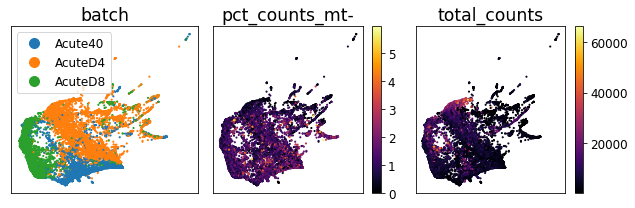

In [177]:
fig, ax = plt.subplots(1,3, figsize=(9,3)); ax=ax.flatten()

for i,key in enumerate(['batch', 'pct_counts_mt-', 'total_counts']):
    scprep.plot.scatter2d(acute.obsm['X_phate'], c=acute.obs[key], ax=ax[i], ticks=None, title=key)
    
plt.tight_layout()

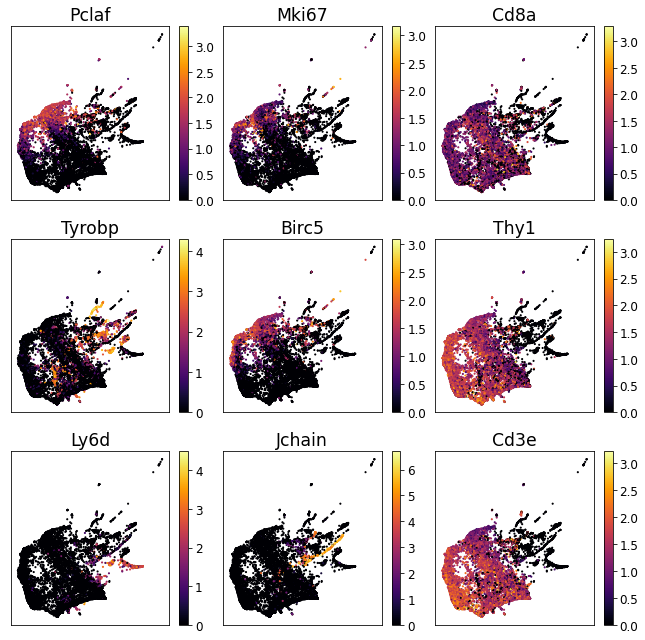

In [165]:
cell_type_annotaters = ["Pclaf","Mki67","Cd8a","Tyrobp","Birc5","Thy1","Ly6d","Jchain","Cd3e"]
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(cell_type_annotaters):
    scprep.plot.scatter2d(acute.obsm['X_phate'], c=acute.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

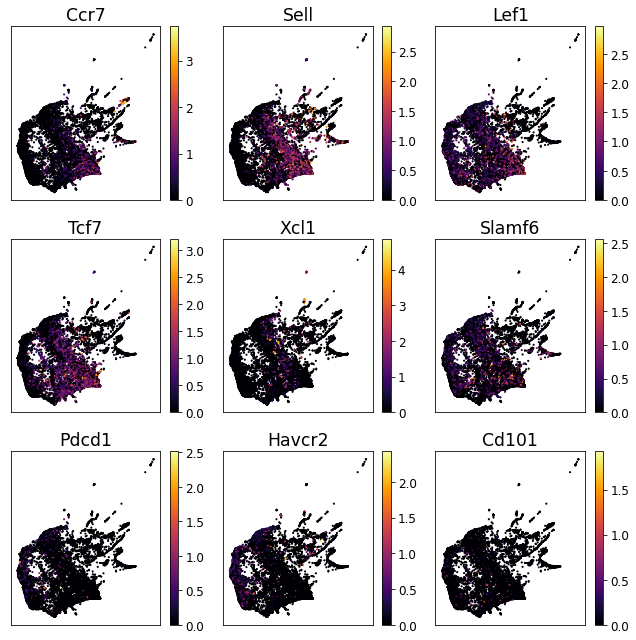

In [142]:
markers = ['Ccr7', 'Sell', 'Lef1', 'Tcf7', 'Xcl1', 'Slamf6', 'Pdcd1', 'Havcr2', 'Cd101']
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(markers):
    scprep.plot.scatter2d(acute.obsm['X_phate'], c=acute.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

In [167]:
acute.write('data/acute_all_cells.h5ad')

## Chronic

In [ ]:
chronic = scanpy.concat([data_objects['ChronicD4'], data_objects['ChronicD8'], data_objects['Chronic40']], 
              keys=['ChronicD4', 'ChronicD8', 'Chronic40'], index_unique='_')

In [172]:
scanpy.pp.filter_cells(chronic, min_counts=500)
scanpy.pp.filter_cells(chronic, max_counts=25000)
chronic.var["mt-"] = chronic.var_names.str.startswith("mt-")
scanpy.pp.calculate_qc_metrics(chronic, inplace=True, qc_vars=['mt-'])
chronic = chronic[(chronic.obs['pct_counts_mt-'] < 6)]
scanpy.pp.normalize_per_cell(chronic)
scanpy.pp.log1p(chronic)

/home/aarthivenkat/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:524: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


In [174]:
phate_op = phate.PHATE(random_state=42)
data_phate = phate_op.fit_transform(chronic.to_df())

Calculating PHATE...
  Running PHATE on 23160 observations and 14769 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 11.76 seconds.
    Calculating KNN search...
    Calculated KNN search in 71.08 seconds.
    Calculating affinities...
    Calculated affinities in 10.13 seconds.
  Calculated graph and diffusion operator in 93.20 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.91 seconds.
    Calculating KMeans...
    Calculated KMeans in 9.64 seconds.
  Calculated landmark operator in 12.60 seconds.
  Calculating optimal t...
    Automatically selected t = 33
  Calculated optimal t in 2.15 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.42 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.95 seconds.
Calculated PHATE in 114.32 seconds.


In [178]:
chronic.obsm['X_phate'] = data_phate

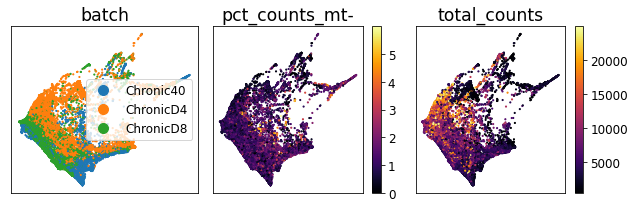

In [179]:
fig, ax = plt.subplots(1,3, figsize=(9,3)); ax=ax.flatten()

for i,key in enumerate(['batch', 'pct_counts_mt-', 'total_counts']):
    scprep.plot.scatter2d(chronic.obsm['X_phate'], c=chronic.obs[key], ax=ax[i], ticks=None, title=key)
    
plt.tight_layout()

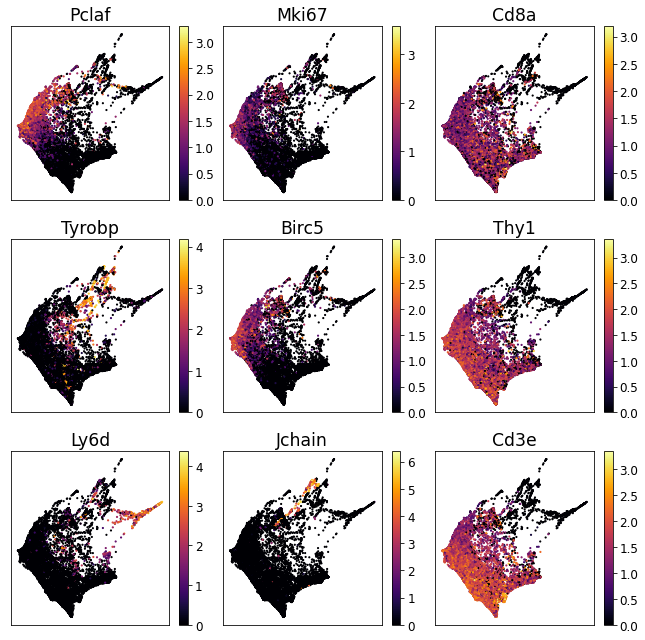

In [180]:
cell_type_annotaters = ["Pclaf","Mki67","Cd8a","Tyrobp","Birc5","Thy1","Ly6d","Jchain","Cd3e"]
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(cell_type_annotaters):
    scprep.plot.scatter2d(chronic.obsm['X_phate'], c=chronic.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

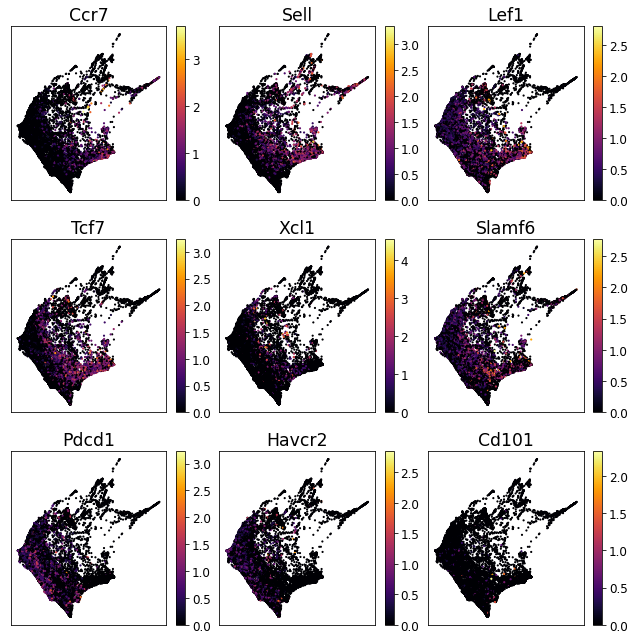

In [181]:
markers = ['Ccr7', 'Sell', 'Lef1', 'Tcf7', 'Xcl1', 'Slamf6', 'Pdcd1', 'Havcr2', 'Cd101']
fig, ax = plt.subplots(3,3, figsize=(9,9)); ax=ax.flatten()
for i,marker in enumerate(markers):
    scprep.plot.scatter2d(chronic.obsm['X_phate'], c=chronic.to_df()[marker], ticks=None, ax=ax[i], title=marker)
    
plt.tight_layout()

In [183]:
chronic.write('data/chronic_all_cells.h5ad')